In [ ]:
#Instalación silenciosa del paquete missingno
%%capture
#los signos %% evita que se muestre output
!pip install missingno #el signo ! indica que es un comando


In [ ]:
#Librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes
import matplotlib.pyplot as plt # Creación de gráficos
sns.set(style="whitegrid") #utilidades especificas para visualización
plt.rcParams["figure.figsize"] = (10, 6) #utilidades especificas para visualización


#1. Obtención del dataset y breve vistazo a los datos


In [ ]:
#Procedemos a cargar el dataset y visualizarlo
df_clean=pd.read_csv("cleaned_train.csv")

# Obtenemos una lista de las columnas que queremos cambiar su tipo
cat_cols = [
    'brand','model','fuel_type','transmission',
    'ext_col','int_col','accident','clean_title'
]
# Cambiamos el tipo a category
df_clean[cat_cols] = df_clean[cat_cols].astype('category')

df_clean.info() #ver los datatypes, valores faltantes
df_clean.describe() #stats de columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             188533 non-null  int64   
 1   brand          188533 non-null  category
 2   model          188533 non-null  category
 3   model_year     188533 non-null  int64   
 4   milage         188533 non-null  float64 
 5   fuel_type      188533 non-null  category
 6   transmission   188533 non-null  category
 7   ext_col        188533 non-null  category
 8   int_col        188533 non-null  category
 9   accident       188533 non-null  category
 10  clean_title    188533 non-null  category
 11  price          188533 non-null  int64   
 12  car_age        188533 non-null  float64 
 13  horsepower     188533 non-null  float64 
 14  engine_size_L  188533 non-null  float64 
 15  cylinders      188533 non-null  float64 
dtypes: category(8), float64(5), int64(3)
memory usage: 13.6 

,id,model_year,milage,price,car_age,horsepower,engine_size_L,cylinders
count,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000,188533.000000
mean,94266.000000,2015.829998,65397.767531,37203.735537,10.095055,338.395846,3.782440,6.292405
std,54424.933488,5.660967,48748.009000,25835.226624,5.444858,96.924358,1.303176,1.372608
min,0.000000,1974.000000,100.000000,2000.000000,2.000000,107.500000,0.650000,3.000000
25%,47133.000000,2013.000000,24115.000000,17000.000000,6.000000,280.000000,3.000000,6.000000
50%,94266.000000,2017.000000,57785.000000,30825.000000,9.000000,329.000000,3.500000,6.000000
75%,141399.000000,2020.000000,95400.000000,49900.000000,13.000000,395.000000,4.600000,8.000000
max,188532.000000,2024.000000,202327.500000,99250.000000,23.500000,567.500000,7.000000,11.000000


In [ ]:
#visualización del dataset
df_clean.head() #muestra las primeras filas

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,car_age,horsepower,engine_size_L,cylinders
0,0,MINI,Cooper S Base,2007,202327.5,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,19.0,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250.0,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,23.5,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731.0,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,23.5,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500.0,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,9.0,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388.0,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,5.0,208.0,2.0,4.0


#2.Análisis Univariado – Métricas Numéricas

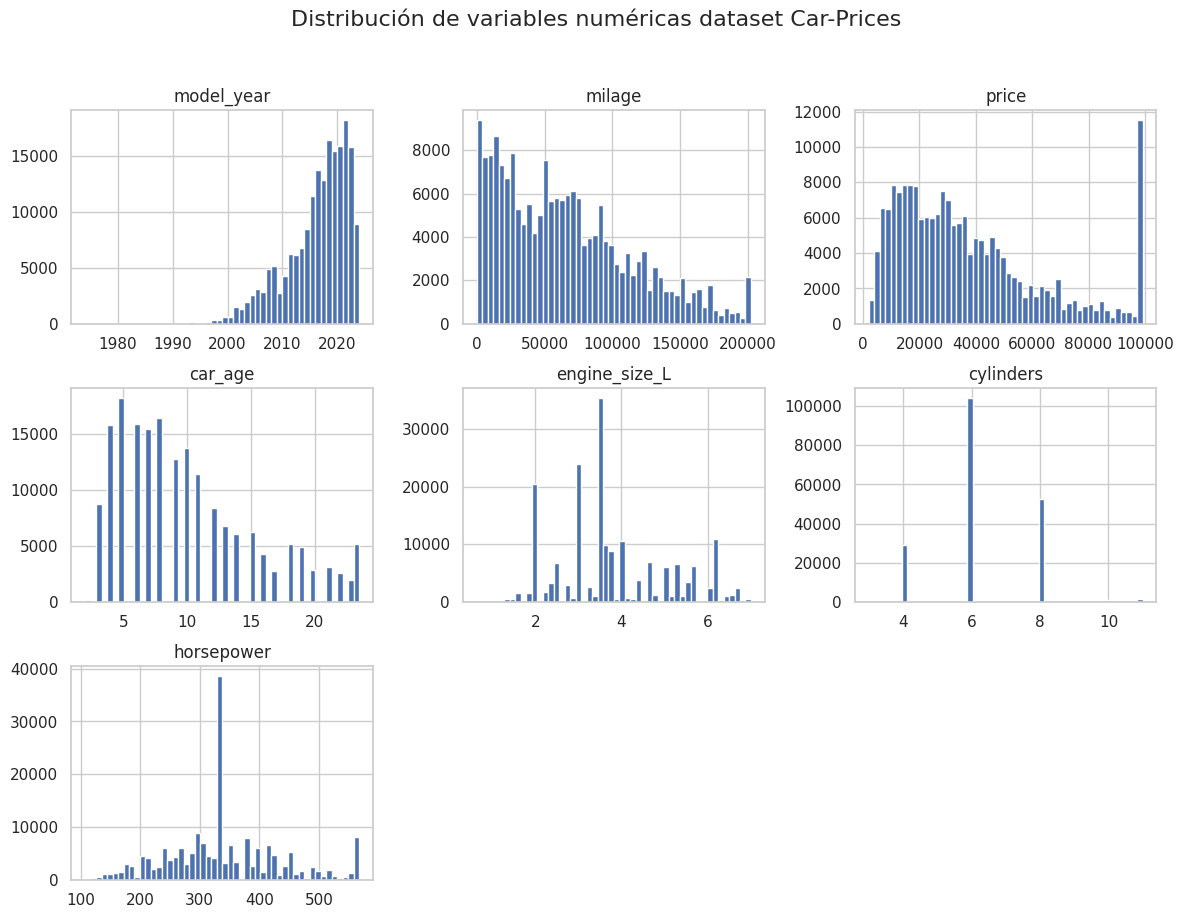

In [51]:
#Guardamos las variables númericas en una lista
variables_numericas = ['model_year','milage','price','car_age','engine_size_L','cylinders','horsepower']
# Realización de histograma por cada columna dentro del array
df_clean[variables_numericas].hist(
    figsize=(14,10),
    bins=50
)

plt.suptitle("Distribución de variables numéricas dataset Car-Prices", fontsize=16)
plt.show()


#3.Detección de outliers (método IQR)

In [ ]:
import pandas as pd

#Visualización de outliers hechos manualmente
outliers_summary = {}

for col in variables_numericas:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    outliers_summary[col] = outliers.shape[0]

#Dataframe para visualizar la cantidad de registros que son outliers
outliers_summary


{'model_year': 5132,
 'milage': 0,
 'price': 0,
 'car_age': 0,
 'engine_size_L': 0,
 'cylinders': 0}

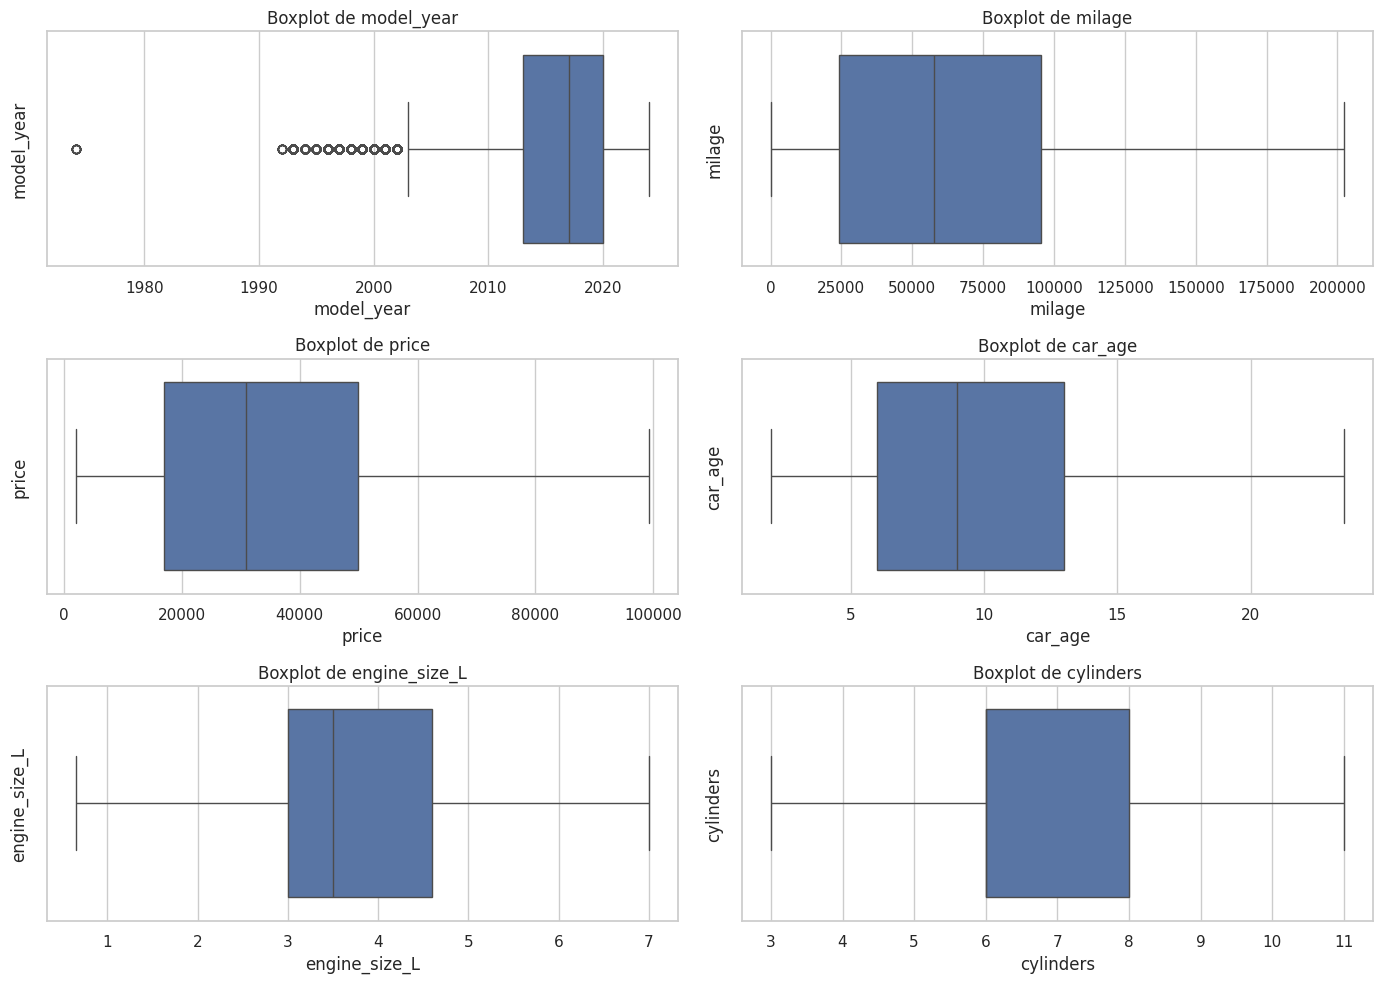

In [ ]:
plt.figure(figsize=(14,10))

for i, col in enumerate(variables_numericas, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(
        x=df_clean[col], # Aquí se define como se muestra el boxplot, en horizontal o vertical
        orient='h'       # Esto hace automáticamente los quartiles
    )
    plt.title(f'Boxplot de {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             188533 non-null  int64   
 1   brand          188533 non-null  category
 2   model          188533 non-null  category
 3   model_year     188533 non-null  int64   
 4   milage         188533 non-null  float64 
 5   fuel_type      188533 non-null  category
 6   transmission   188533 non-null  category
 7   ext_col        188533 non-null  category
 8   int_col        188533 non-null  category
 9   accident       188533 non-null  category
 10  clean_title    188533 non-null  category
 11  price          188533 non-null  int64   
 12  car_age        188533 non-null  float64 
 13  horsepower     188533 non-null  float64 
 14  engine_size_L  188533 non-null  float64 
 15  cylinders      188533 non-null  float64 
dtypes: category(8), float64(5), int64(3)
memory usage: 13.6 

In [ ]:
df_clean.head()

,id,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,car_age,horsepower,engine_size_L,cylinders
0,0,MINI,Cooper S Base,2007,202327.5,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,19.0,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250.0,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,23.5,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731.0,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,23.5,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500.0,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,9.0,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388.0,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,5.0,208.0,2.0,4.0


#Análisis Univariado variables categóricas

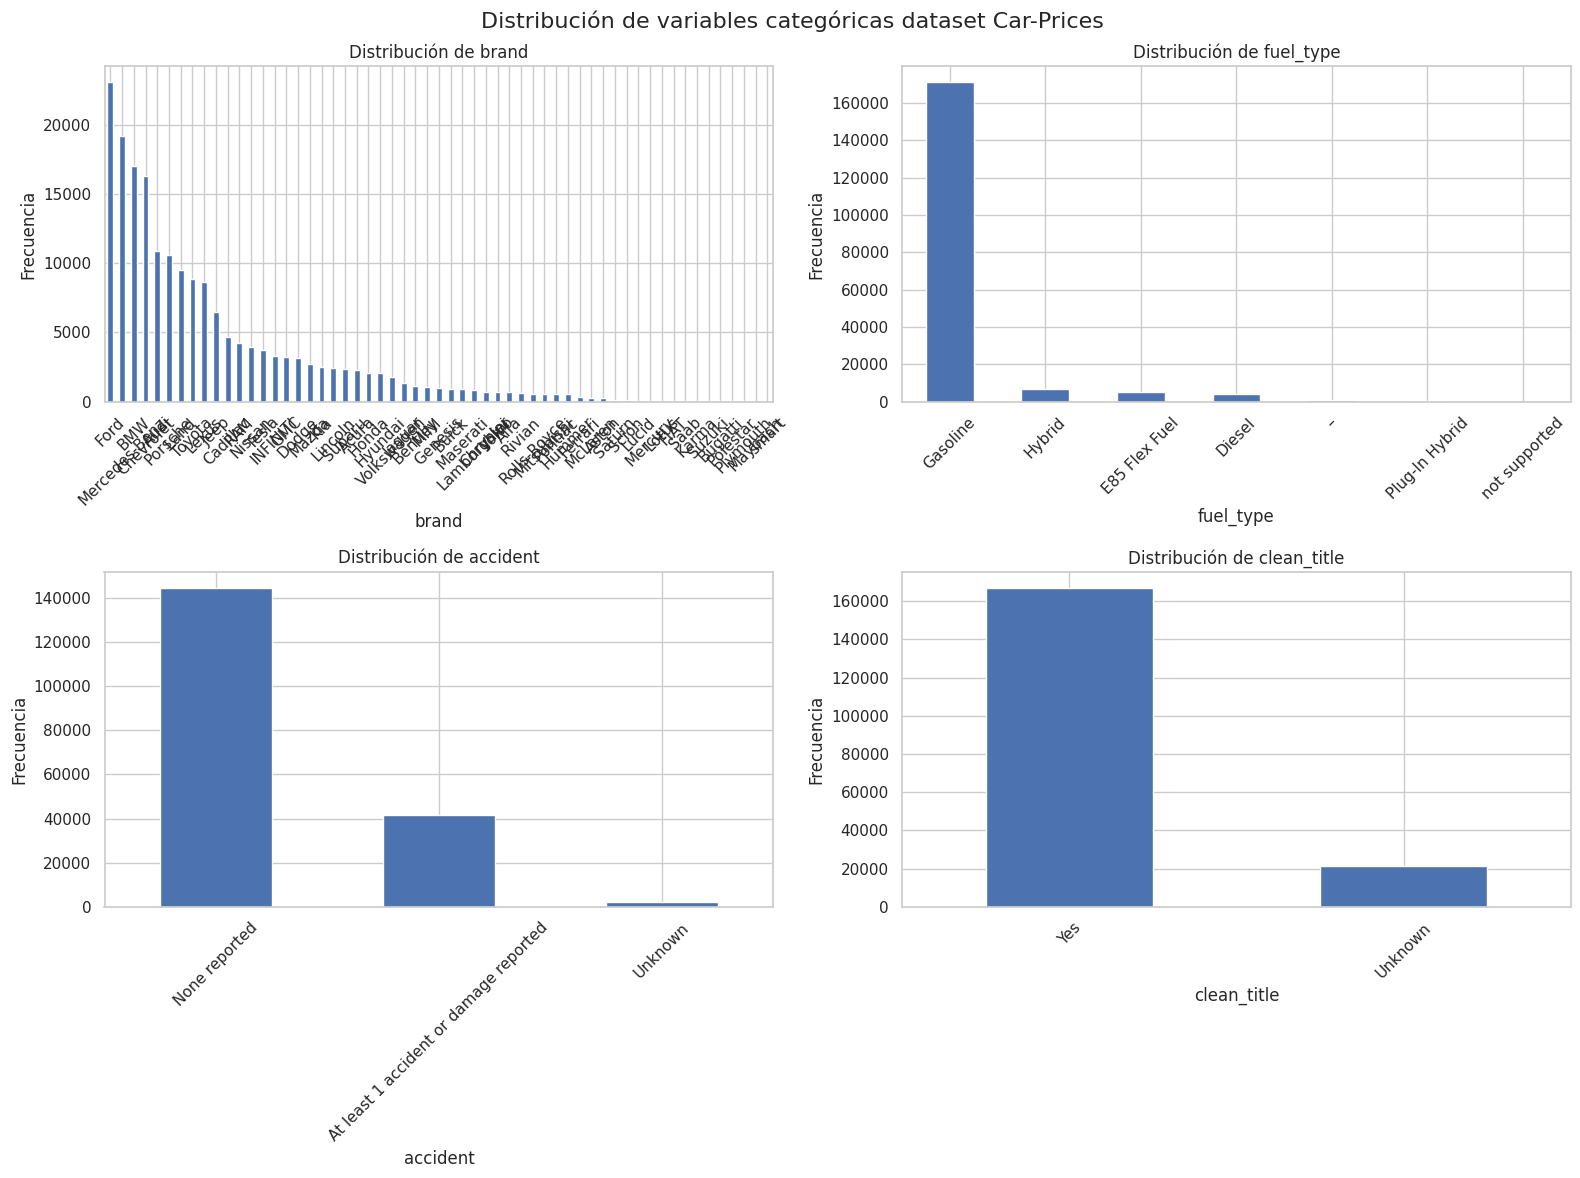

In [ ]:
#Guardamos las variables categóricasen una lista
variables_categoricas = ['brand','fuel_type','accident','clean_title']
# Realización de histograma por cada columna dentro del array
# Crear figura con subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(variables_categoricas):
    df_clean[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("Distribución de variables categóricas dataset Car-Prices", fontsize=16)
plt.tight_layout()
plt.show()

#Relación de precio con otras categorias

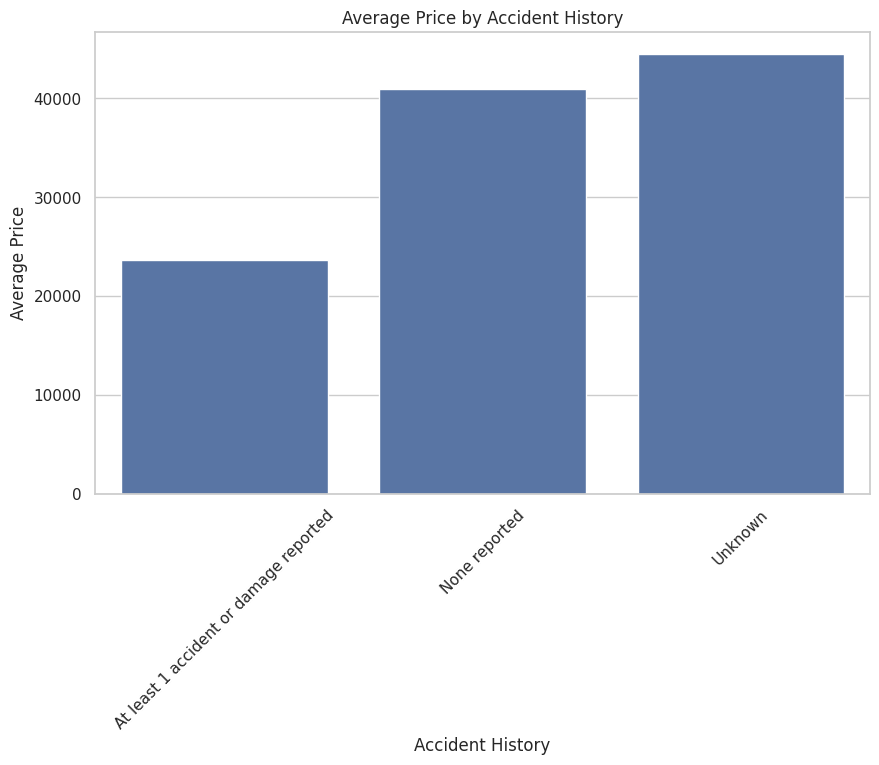

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='accident', y='price', data=df_clean
            , errorbar=None)
plt.title('Average Price by Accident History')
plt.xlabel('Accident History')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

#4.Correlación de Métricas de Incremento

In [ ]:
# Muestra de la Matrix de correlación
correlation_matrix = df_clean[variables_numericas].corr()
print("Matriz de Correlación de Métricas de Incremento:")
print(correlation_matrix)


Matriz de Correlación de Métricas de Incremento:
               model_year    milage     price   car_age  engine_size_L  \
model_year       1.000000 -0.674709  0.583629 -0.994419      -0.009925   
milage          -0.674709  1.000000 -0.647345  0.687586      -0.024693   
price            0.583629 -0.647345  1.000000 -0.595752       0.172310   
car_age         -0.994419  0.687586 -0.595752  1.000000       0.009444   
engine_size_L   -0.009925 -0.024693  0.172310  0.009444       1.000000   
cylinders       -0.030643 -0.043283  0.178968  0.030716       0.828259   

               cylinders  
model_year     -0.030643  
milage         -0.043283  
price           0.178968  
car_age         0.030716  
engine_size_L   0.828259  
cylinders       1.000000  


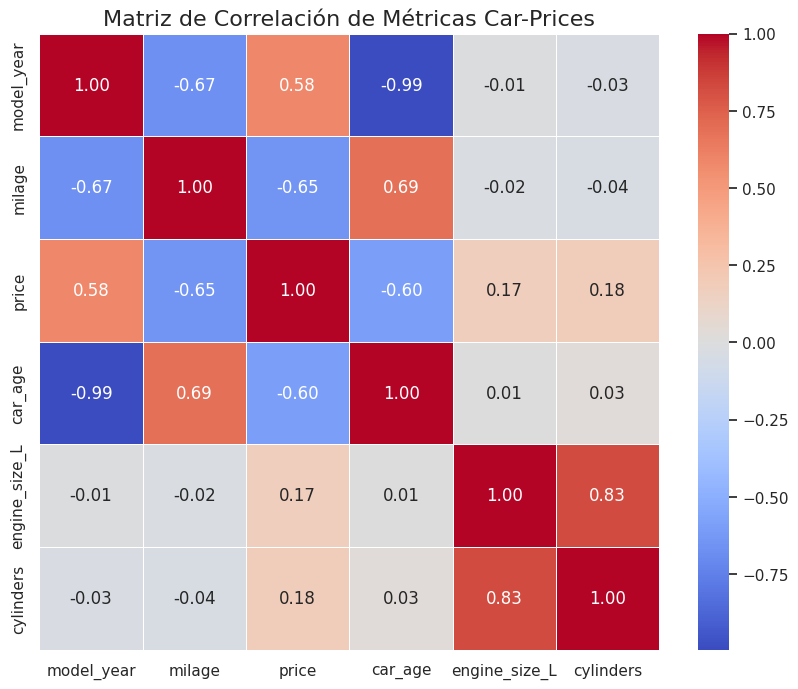

In [ ]:
#Mapa de calor para ver la correlación de todas las variables de incremento, eligiendo las mas cercanas a 1
# Para el análisis bivariado
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f", # Format annotation values to two decimal places
    linewidths=.5 # Add lines between cells for better readability
)
plt.title('Matriz de Correlación de Métricas Car-Prices', fontsize=16)
plt.show()


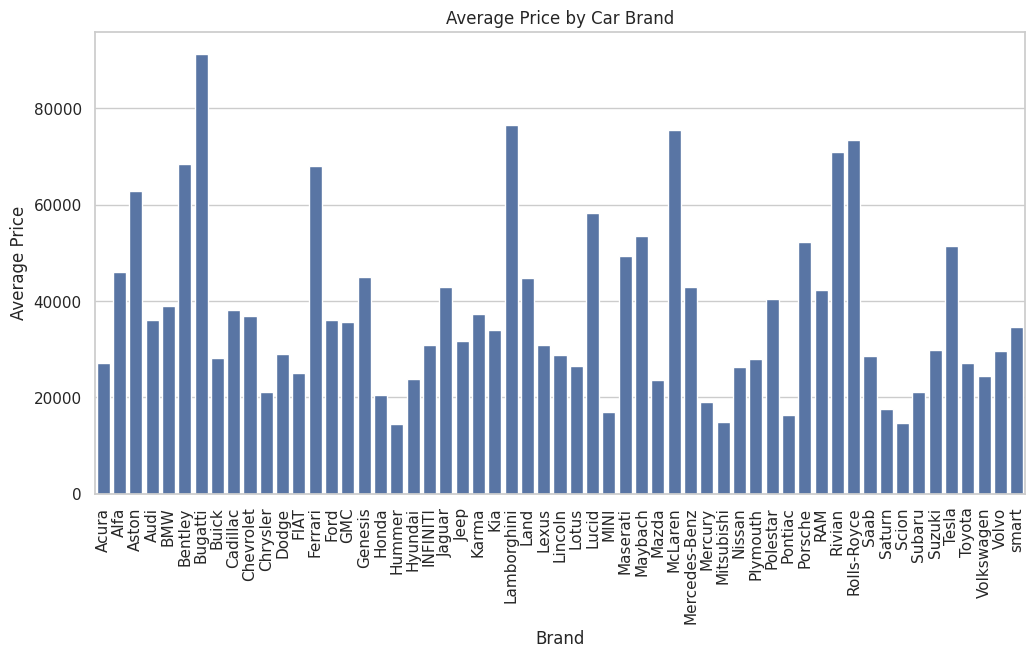

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='brand', y='price', data=df_clean, errorbar=None) #Automáticamente agrupa la media y lo agrupa por brand
plt.title('Average Price by Car Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()